# Binary Image Classification (from Scratch)

Orginal File:
https://colab.research.google.com/drive/1MkjBqoR1JQQ-Qgnwn0DxWs4GfaZw4Wnd#scrollTo=IdMWbBHej9Oe

Custom Functions

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [8]:
# Predictor

def predict(x_array, w_array):
  z = np.dot(x_array, w_array)
  return 1 / (1 + np.exp(-z))

In [9]:
# Cost Function

def cost_function(x_matrix, y_array, w_array):
  predictions = predict(x_matrix, w_array)
  predictions = np.clip(predictions, 1e-15, 1 - 1e-15)
  errors = - np.log(predictions) * y_array - (1 - y_array) * np.log(1 - predictions)
  return np.mean(errors)


In [10]:
# Gradient Descent

def gradient_descent(x_matrix, y_array, w_array, learning_rate):
  predictions = predict(x_matrix, w_array.T)
  errors = predictions - y_array
  gradients = np.dot(x_matrix.T, errors) / len(y_array)
  return w_array - gradients * learning_rate


In [11]:
# Train Function

def train(x_matrix, y_array, w_array, learning_rate, epochs, verbose = True, verbose_period = 20):
  cost_vals = []
  for i in range(epochs):
    cost = cost_function(x_matrix, y_array, w_array)
    cost_vals.append(cost)
    if verbose and i % verbose_period == 0:
      print(f"Epoch : {i}   Cost : {cost}")
    w_array = gradient_descent(x_matrix, y_array, w_array, learning_rate)
  return w_array, cost_vals


Usage on a Dataset

In [12]:
# Import Dataset

filename = "data/dataset/mnist_train_small.csv"
df = pd.read_csv(filename)

In [13]:
true_num = 3

true_num_label = 1
false_num_label = 0

In [14]:
# Extracting the data
y_array = df.iloc[:, 0].to_numpy()
y_array = np.array([true_num_label if true_num == i else false_num_label for i in y_array])
x_matrix = df.iloc[:, 1:].to_numpy()

In [15]:
# Splitting to train and test groups
x_train, x_test, y_train, y_test = train_test_split(x_matrix, y_array, test_size = 0.2, random_state = 42)

# Scaling Data
scaler = StandardScaler(with_mean = False)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
# Initialize weights with small random values
w_array = np.random.randn(x_train.shape[1]) * 0.01

In [17]:
# Training

learning_rate = 0.01
epochs = 1000

w_array, cost_vals = train(x_train, y_train, w_array, learning_rate, epochs, verbose = True, verbose_period = 300)


Epoch : 0   Cost : 0.7739060032098405
Epoch : 300   Cost : 0.1214214144542686
Epoch : 600   Cost : 0.10702330169447963
Epoch : 900   Cost : 0.10088911434225091


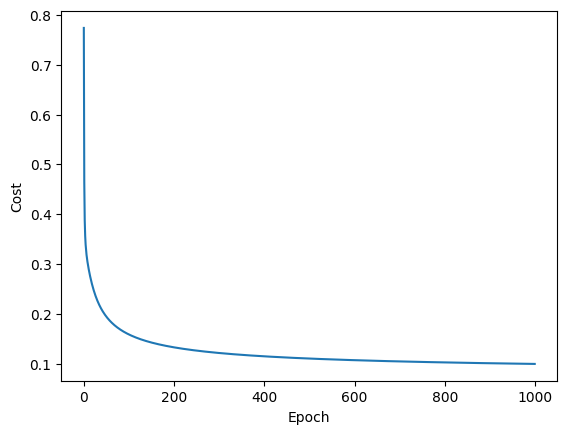

In [18]:
# Plotting Training Data

plt.plot([_ for _ in range(len(cost_vals))], cost_vals)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

In [19]:
# Testing

y_predictions = [1 if predict(x_array, w_array) > 0.5 else 0 for x_array in x_test]
accuracy = accuracy_score(y_test, y_predictions)

print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 97.20%


In [20]:
# Storing the Model
import pickle

with open(f'models/model_for_{true_num}', 'wb') as file:
    modal_data = {
        'scaler':scaler,
        'w_array':w_array}
    pickle.dump(modal_data, file)